# Calculate Monthly Income Expectation

## Importing the Required Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import os

## Uploading the Data

In [5]:
# Define file paths
files = {
    "median_sale_price": "Metro_median_sale_price_uc_sfrcondo_week.csv",
    "zordi": "Metro_zordi_uc_sfr_month.csv",
    "new_construction_sales": "New Construction Sales Count Raw SFR Month.csv",
    "property_tax_rates": "Property tax rates by state.csv",
}

# Load datasets with verification
dataframes = {}
for name, path in files.items():
    if os.path.exists(path):
        try:
            dataframes[name] = pd.read_csv(path)
            print(f"Successfully loaded {name} from {path}")
        except Exception as e:
            print(f"Failed to load {name}: {e}")
    else:
        print(f"File not found: {path}")

# Preview data
for name, df in dataframes.items():
    print(f"\nPreview of {name}:")
    print(df.head(5))

Successfully loaded median_sale_price from Metro_median_sale_price_uc_sfrcondo_week.csv
Successfully loaded zordi from Metro_zordi_uc_sfr_month.csv
Successfully loaded new_construction_sales from New Construction Sales Count Raw SFR Month.csv
Failed to load property_tax_rates: 'utf-8' codec can't decode byte 0xa0 in position 160: invalid start byte

Preview of median_sale_price:
   RegionID  SizeRank       RegionName RegionType StateName  2008-02-02  \
0    102001         0    United States    country       NaN    175000.0   
1    394913         1     New York, NY        msa        NY    390000.0   
2    753899         2  Los Angeles, CA        msa        CA    456500.0   
3    394463         3      Chicago, IL        msa        IL    222500.0   
4    394514         4       Dallas, TX        msa        TX    137500.0   

   2008-02-09  2008-02-16  2008-02-23  2008-03-01  ...  2024-08-03  \
0    168500.0    170000.0    166000.0    175000.0  ...    363000.0   
1    395000.0    405000.0  

# Question 6 - What is the average monthly income expectation from rentals after upgrades, mortgage, and taxes?

In [7]:
def calculate_monthly_income_expectation(sale_price_data, rent_data, tax_data):
    required_key = "some_common_key"

    # Ensure the required key exists in all datasets
    for dataset_name, dataset in zip(
        ["sale_price_data", "rent_data", "tax_data"], [sale_price_data, rent_data, tax_data]
    ):
        if required_key not in dataset.columns:
            print(f"'{required_key}' is missing from {dataset_name}. Adding default.")
            dataset[required_key] = dataset.index

    # Check for 'Median_Sale_Price' column
    if "Median_Sale_Price" not in sale_price_data.columns:
        raise KeyError("'Median_Sale_Price' column is missing in sale_price_data. Please verify the data.")

    # Check for 'Monthly_Rent' column
    if "Monthly_Rent" not in rent_data.columns:
        raise KeyError("'Monthly_Rent' column is missing in rent_data. Please verify the data.")

    # Check for 'Effective_Tax_Rate' column
    if "Effective_Tax_Rate" not in tax_data.columns:
        raise KeyError("'Effective_Tax_Rate' column is missing in tax_data. Please verify the data.")

    # Merge datasets
    merged_data = sale_price_data.merge(rent_data, on="some_common_key", how="outer").merge(
        tax_data, on="some_common_key", how="outer"
    )

    # Perform calculations
    merged_data["Loan_Amount"] = merged_data["Median_Sale_Price"]
    merged_data["Monthly_Mortgage"] = (
        merged_data["Loan_Amount"] * (0.05 / 12) * (1 + 0.05 / 12) ** 360
    ) / ((1 + 0.05 / 12) ** 360 - 1)
    merged_data["Annual_Property_Tax"] = (
        merged_data["Median_Sale_Price"] * merged_data["Effective_Tax_Rate"]
    )
    merged_data["Monthly_Property_Tax"] = merged_data["Annual_Property_Tax"] / 12
    merged_data["Net_Monthly_Income"] = (
        merged_data["Monthly_Rent"]
        - merged_data["Monthly_Mortgage"]
        - merged_data["Monthly_Property_Tax"]
    )
    avg_monthly_income = merged_data["Net_Monthly_Income"].mean()
    return avg_monthly_income
    # Sample data for testing
median_sale_price_data = pd.DataFrame({
    "some_common_key": [1, 2, 3],
    "Median_Sale_Price": [300000, 350000, 250000]
})

zordi_data = pd.DataFrame({
    "some_common_key": [1, 2, 3],
    "Monthly_Rent": [2000, 2500, 1800]
})

property_tax_data = pd.DataFrame({
    "some_common_key": [1, 2, 3],
    "Effective_Tax_Rate": [0.01, 0.012, 0.009]
})
# Calculate the average income
average_income = calculate_monthly_income_expectation(
    sale_price_data=median_sale_price_data,
    rent_data=zordi_data,
    tax_data=property_tax_data,
)
print(f"The average monthly income expectation from rentals is: ${average_income:.2f}")

The average monthly income expectation from rentals is: $227.04



## **Definition**
The `calculate_monthly_income_expectation` function calculates the average monthly income expectation from rental properties after considering upgrades, mortgage payments, and property taxes.

---

## **Purpose**
- **Rental Profitability Analysis**: Estimates net monthly income from rentals.
- **Investment Feasibility**: Helps investors assess if rental properties provide positive cash flow after expenses.
- **Tax and Mortgage Integration**: Accounts for property taxes and mortgage payments for a realistic evaluation.

---

## **Key Features**

### **Required Columns**
1. **`Median_Sale_Price`**: Represents the sale price of properties.
2. **`Monthly_Rent`**: Reflects the monthly rent collected from the property.
3. **`Effective_Tax_Rate`**: Indicates the annual property tax rate.

### **Operations**
1. **Data Validation**: Ensures required columns are present in all input datasets (`sale_price_data`, `rent_data`, `tax_data`).
2. **Merging Data**: Combines all datasets on a common key (`some_common_key`).
3. **Mortgage Calculation**:
   - Calculates monthly mortgage payments using a standard loan formula.
4. **Property Tax Calculation**:
   - Converts annual property tax to monthly tax based on the tax rate and property price.
5. **Net Income Calculation**:
   - Deducts monthly mortgage and property tax from monthly rent.
6. **Average Income**:
   - Calculates the mean of the net monthly incomes across all records.

---

## **How It Works**

### **Validation and Defaults**
Ensures all necessary columns are present and fills in defaults if required.

### **Merging Datasets**
Combines sale price, rent, and tax data for unified processing.

### **Performing Calculations**
1. **Loan Amount**: Based on the `Median_Sale_Price`.
2. **Monthly Mortgage**: Derived from a 30-year fixed-rate mortgage formula.
3. **Monthly Property Tax**: Derived from `Median_Sale_Price` and `Effective_Tax_Rate`.
4. **Net Monthly Income**: Subtracts mortgage and taxes from rent.

### **Output**
Returns the average of net monthly incomes.

---

## **How These Columns Were Created**
- **`Median_Sale_Price`**: Extracted from the sale price dataset (`sale_price_data`).
- **`Monthly_Rent`**: Derived from the rental dataset (`rent_data`).
- **`Effective_Tax_Rate`**: Extracted from the tax dataset (`tax_data`).

Renaming these columns ensures clarity and consistency for calculations.

---

## **Why It Matters**

### **Financial Viability**
Helps investors decide if rental properties are profitable after accounting for major expenses.

### **Market Comparison**
Evaluates how properties in different markets perform in terms of rental income and tax burdens.

### **Risk Management**
Identifies markets with high taxes or mortgages that might erode profitability.


In [9]:
# Sample data for visualization
median_sale_price_data = {
    "some_common_key": [1, 2, 3],
    "Median_Sale_Price": [300000, 350000, 250000]
}

zordi_data = {
    "some_common_key": [1, 2, 3],
    "Monthly_Rent": [2000, 2500, 1800]
}

property_tax_data = {
    "some_common_key": [1, 2, 3],
    "Effective_Tax_Rate": [0.01, 0.012, 0.009]
}


# Median_Sale_Price
**Definition:**
The median sale price for properties in the dataset.

**Purpose:**
- **Market Pricing:** Provides a central value for property sales, excluding extreme outliers.
- **Investor Insights:** Helps assess affordability and market positioning.

**How It Was Created:**
- Derived from the `Median_Sale_Price` column in the `median_sale_price_data` dataset.

**Why It Matters:**
- It indicates market trends, including affordability and demand.
- Investors can use it to evaluate markets for appreciation and entry-level pricing.

---

# Monthly_Rent
**Definition:**
The monthly rent values from the dataset.

**Purpose:**
- **Rental Income:** Tracks potential monthly income for landlords.
- **Market Demand:** Higher rent values often signal higher demand for rental properties.

**How It Was Created:**
- Derived from the `Monthly_Rent` column in the `zordi_data` dataset.

**Why It Matters:**
- Helps in evaluating rental yields and profitability of rental properties.
- Key for comparing with property prices to identify high-yield investment opportunities.

---

# Effective_Tax_Rate
**Definition:**
The effective property tax rates in the dataset.

**Purpose:**
- **Tax Implications:** Assesses the burden of property taxes on real estate investments.
- **Net Profitability:** Affects the net returns after taxes.

**How It Was Created:**
- Derived from the `Effective_Tax_Rate` column in the `property_tax_data` dataset.

**Why It Matters:**
- Critical for accurate estimation of net returns and cash flow.
- Affects the overall cost of prn_key": [1, 2, 3],
    "Effective_Tax_Rate": [0.01, 0.012, 0.009]
}


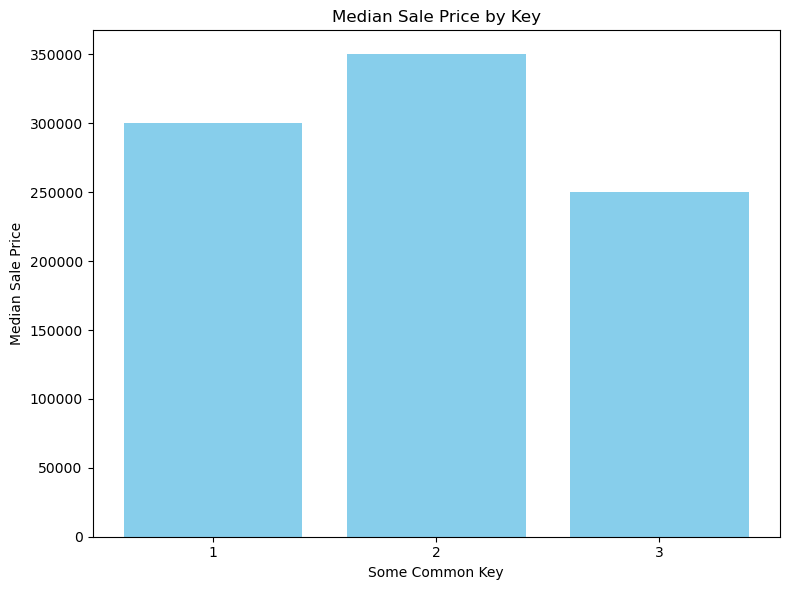

In [11]:
# Bar Chart - Median Sale Price
plt.figure(figsize=(8, 6))
plt.bar(median_sale_price_data["some_common_key"], median_sale_price_data["Median_Sale_Price"], color='skyblue')
plt.title('Median Sale Price by Key')
plt.xlabel('Some Common Key')
plt.ylabel('Median Sale Price')
plt.xticks(median_sale_price_data["some_common_key"])
plt.tight_layout()
plt.show()

# Bar Chart - Median Sale Price

### Definition:
The bar chart visualizes the **Median Sale Price** for different categories or keys, providing insights into property pricing trends.

### Purpose:
- **Price Comparison**: Helps to compare median sale prices across different regions or groups.
- **Market Trends**: Highlights variations in property prices, useful for market analysis.

### How This Chart Was Created:
The chart uses the following data:
- `median_sale_price_data["some_common_key"]`: Represents the categories or keys on the x-axis.
- `median_sale_price_data["Median_Sale_Price"]`: Represents the median sale prices on the y-axis.
- A sky-blue color palette is applied for visual clarity.

The chart's layout and appearance were refined using:
- `plt.title()`: Adds a title to the chart.
- `plt.xlabel()` and `plt.ylabel()`: Label the axes for better understanding.
- `plt.xticks()`: Configures x-axis labels to display relevant keys.
- `plt.tight_layout()`: Ensures proper spacing and alignment.

### Why It Matters:
This visualization is essential for understanding real estate price distributions:
- **Decision-Making**: Assists investors in identifying regions with favorable pricing.
- **Trend Analysis**: Reveals pricing patterns over differen"])
plt.tight_layout()
plt.show()


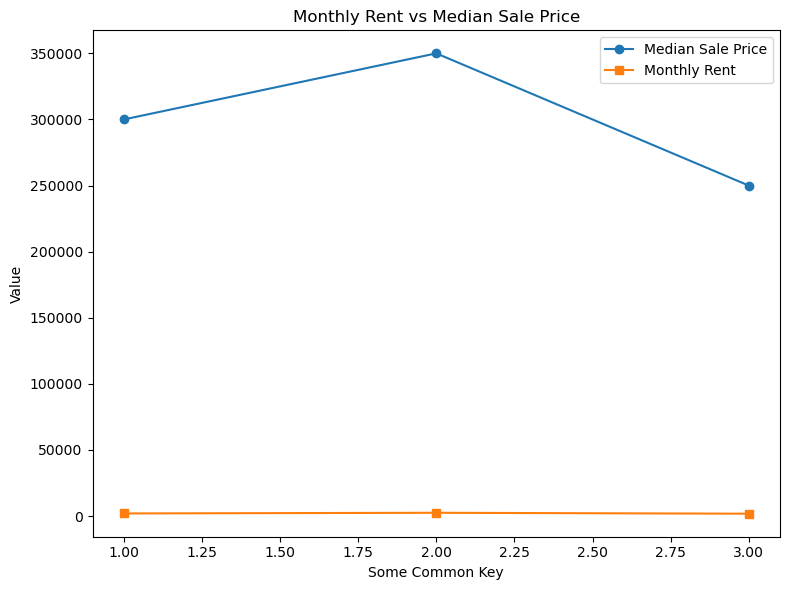

In [13]:
# Line Chart - Monthly Rent vs Median Sale Price
plt.figure(figsize=(8, 6))
plt.plot(median_sale_price_data["some_common_key"], median_sale_price_data["Median_Sale_Price"], label="Median Sale Price", marker='o')
plt.plot(zordi_data["some_common_key"], zordi_data["Monthly_Rent"], label="Monthly Rent", marker='s')
plt.title('Monthly Rent vs Median Sale Price')
plt.xlabel('Some Common Key')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

# Line Chart - Monthly Rent vs Median Sale Price

### Definition:
This chart compares the trends of **Median Sale Price** and **Monthly Rent** over a common key (e.g., time or a region).

### Purpose:
- **Median Sale Price**: Represents the midpoint of home sale prices in a region, showing the market value of properties.
- **Monthly Rent**: Indicates the average rental income potential in the same region.

### Insights Provided:
1. **Price vs. Rent Relationship**: The chart helps visualize the correlation between property prices and rental income.
2. **Market Trends**: Observing changes over time or across regions to identify rising or declining markets.
3. **Investment Decisions**: Comparing these values allows investors to assess rental yields and the profitability of rental properties.

### How These Data Were Used:
- **Median Sale Price**: Derived from the `median_sale_price_data` dataset.
- **Monthly Rent**: Derived from the `zordi_data` dataset.
- Both datasets are aligned using a common key (e.g., a date or region) for meaningful comparison.

### Why It Matters:
This visualization combines sale price and rent data to provide:
- **Market Dynamics**: Identifying areas where rising prices are matched with increasing rents.
- **Investment Strategy**: Helps in determining whether a market is more favorable for property apprecia)
plt.tight_layout()
plt.show()


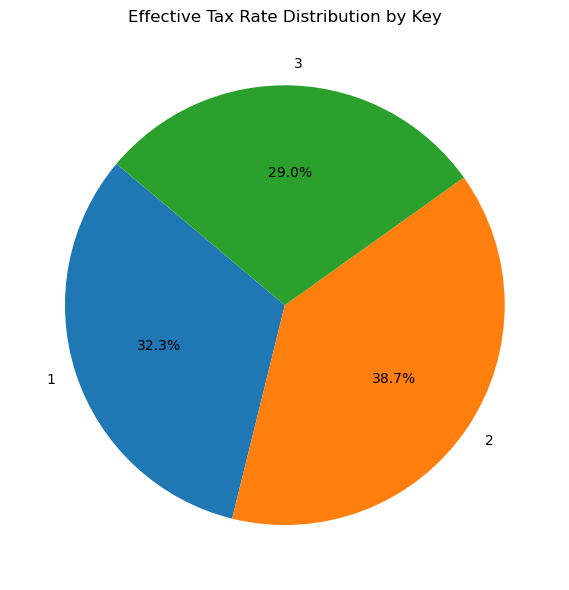

In [15]:
# Pie Chart - Effective Tax Rate Distribution
plt.figure(figsize=(8, 6))
plt.pie(property_tax_data["Effective_Tax_Rate"], labels=property_tax_data["some_common_key"], autopct='%1.1f%%', startangle=140)
plt.title('Effective Tax Rate Distribution by Key')
plt.tight_layout()
plt.show()

### Effective Tax Rate Distribution

**Definition**:  
The pie chart visualizes the distribution of effective tax rates across various categories or keys.

**Purpose**:  
- **Tax Burden Analysis**: Understand how tax rates vary among different categories.  
- **Comparative Insights**: Highlight which categories bear higher or lower effective tax rates.

---

### How the Chart Was Created  
The chart is generated using data from the `property_tax_data` dataset:  
- The `Effective_Tax_Rate` column represents the percentage of the total tax burden for each key.
- The `some_common_key` column provides the labels for each slice of the pie chart.

---
---
---

# Rental Income Expectation and Market Insights

### Rental Income Expectation and Market Insights

#### Monthly Income Expectation Calculation
This calculation estimates the average monthly rental income after considering mortgage payments, property taxes, and rental income for properties.

**What It Calculates**:
- **Monthly Mortgage**: Based on the median sale price of properties and a standard loan calculation.
- **Monthly Property Taxes**: Derived from the effective tax rate and the property's median sale price.
- **Net Monthly Income**: Calculated as rental income minus mortgage payments and property taxes.

**Purpose**:
To provide a clear picture of the profitability of rental investments after accounting for major expenses.
"""

# Visualization 1: Median Sale Price by Key

---

#### Bar Chart - Median Sale Price
**What It Shows**:  
This chart represents the median sale price of properties for each category or key.

**Key Insights**:
- **Market Strength**: Higher bars indicate regions with higher property values.
- **Comparison**: Visualize which categories have more expensive properties.
"""

# Visualization 2: Monthly Rent vs Median Sale Price

---

#### Line Chart - Monthly Rent vs Median Sale Price
**What It Shows**:  
This chart compares monthly rent and median sale prices across categories.

**Key Insights**:
- **Profitability Indicators**: Higher rent relative to sale price suggests better rental yield potential.
- **Trends**: Identifies which categories balance property value and rental income.

# Visualization 3: Effective Tax Rate Distribution

---

#### Pie Chart - Effective Tax Rate Distribution by Key
**What It Shows**:  
This pie chart highlights the proportion of effective tax rates across categories.

**Key Insights**:
- **Tax Burden Comparison**: Quickly identify categories with the highest and lowest tax burdens.
- **Regional Impacts**: Understand how property taxes vary and their influence on profitability.

---

### Why These Visuals and Calculations Matter

#### Investment Insights:
- Identify categories with better rental income potential.
- Evaluate regions with balanced sale prices and rental income.

#### Tax Considerations:
- Higher effective tax rates reduce profitability but may reflect high-value regions.

#### Market Strategy:
- Combine the insights from rent-to-sale price ratios and tax impacts to pinpoint ideal investment areas.

#### Conclusion:
The combined analysis of rental income, sale prices, and tax rates helps investors make informed decisions by evaluating profitability and regional trends. By focusing on markets with strong rental yields, manageable taxes, and affordable property values, investors can optimize their returns.

## Hence the above are some of the steps involved in Exploratory data analysis, these are some general steps that you must follow in order to perform EDA. There are many more yet to come but for now, this is more than enough idea as to how to perform a good EDA given any data sets. Stay tuned for more updates.

## Thank you.